In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

In [2]:
# importing dataset, parsing the (Date & Time) columns into a single DATE column and making it the index column

raw_data= pd.read_csv('household_power_consumption.txt', sep=';', parse_dates={'DATE' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, index_col='DATE')
raw_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DATE,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
# shape of dataset

raw_data.shape

(2075259, 7)

In [4]:
# To confirm there's no missing value in the datetime index column
print('sum of missing item in datetime column: ' + str(raw_data.index.isnull().sum()))
print('shape of datetime: '+ str(raw_data.index.shape))

sum of missing item in datetime column: 0
shape of datetime: (2075259,)


# Preprocessing

In [5]:
# checking for missing values
raw_data.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [6]:
#checking for unique values in each of the columns

print(raw_data.groupby('Global_active_power')['Global_active_power'].count())
print('-----------------')
print(raw_data.groupby('Global_reactive_power')['Global_reactive_power'].count())
print('-----------------')
print(raw_data.groupby('Voltage')['Voltage'].count())
print('-----------------')
print(raw_data.groupby('Global_intensity')['Global_intensity'].count())
print('-----------------')
print(raw_data.groupby('Sub_metering_1')['Sub_metering_1'].count())
print('-----------------')
print(raw_data.groupby('Sub_metering_2')['Sub_metering_2'].count())
print('-----------------')
print(raw_data.groupby('Sub_metering_3')['Sub_metering_3'].count())

Global_active_power
0.076        9
0.078      791
0.080     5230
0.082     4466
0.084      703
         ...  
9.732        1
9.922        1
9.938        1
9.994        1
?        25979
Name: Global_active_power, Length: 4187, dtype: int64
-----------------
Global_reactive_power
0.000    481561
0.046     18593
0.048     19040
0.050     19047
0.052     18730
          ...  
1.240         1
1.274         1
1.364         1
1.390         1
?         25979
Name: Global_reactive_power, Length: 533, dtype: int64
-----------------
Voltage
223.200        1
223.490        1
223.850        1
223.990        1
224.190        1
           ...  
253.650        1
253.750        1
253.940        1
254.150        1
?          25979
Name: Voltage, Length: 2838, dtype: int64
-----------------
Global_intensity
0.200     11081
0.400      9406
0.600     50307
0.800     82272
1.000    172785
          ...  
9.200      9238
9.400     10311
9.600     10107
9.800     10743
?         25979
Name: Global_intensity, 

***From the above cell, apart from the 'Date', 'Time' and 'Sub_metering_3' columns, every other column has the question mark (?) symbol as a unique value, and each of those column has a total of 25979 question marks***

In [7]:
raw_data.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [8]:
# Because of the presence of the question mark symbol, we wont be able to deal with the missing values. Hence, we have to
# first deal with the question mark (?) by replacing them with NaN, then handle the missing values later

raw_data.replace({'Global_active_power': {'?': np.nan}}, regex= False, inplace= True)
raw_data.replace({'Global_reactive_power': {'?': np.nan}}, regex= False, inplace= True)
raw_data.replace({'Voltage': {'?': np.nan}}, regex= False, inplace= True)
raw_data.replace({'Global_intensity': {'?': np.nan}}, regex= False, inplace= True)
raw_data.replace({'Sub_metering_1': {'?': np.nan}}, regex= False, inplace= True)
raw_data.replace({'Sub_metering_2': {'?': np.nan}}, regex= False, inplace= True)

In [9]:
# checking for empty values. 

raw_data.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [10]:
raw_data.head(3)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DATE,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0


In [11]:
# Because most of the features are of object tpye, we have to convert to float.

raw_data['Global_active_power']= pd.to_numeric(raw_data['Global_active_power'], downcast= 'float')
raw_data['Global_reactive_power']= pd.to_numeric(raw_data['Global_reactive_power'], downcast= 'float')
raw_data['Voltage']= pd.to_numeric(raw_data['Voltage'], downcast= 'float')
raw_data['Global_intensity']= pd.to_numeric(raw_data['Global_intensity'], downcast= 'float')
raw_data['Sub_metering_1']= pd.to_numeric(raw_data['Sub_metering_1'], downcast= 'float')
raw_data['Sub_metering_2']= pd.to_numeric(raw_data['Sub_metering_2'], downcast= 'float')
raw_data['Sub_metering_3']= pd.to_numeric(raw_data['Sub_metering_3'], downcast= 'float')

In [12]:
raw_data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091631e+00,1.237042e-01,2.433813e+02,4.629239e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057005e+00,1.128308e-01,4.114049e+00,4.440444e+00,6.104221e+00,5.758089e+00,8.458705e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [13]:
# Dealing with missing values by filling them using interpolation 'forward'

df_data= raw_data.interpolate(method= 'linear', limit_direction= 'forward')
df_data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

Text(0.5, 1.0, 'Plot of unsampled Global_active_power over the years')

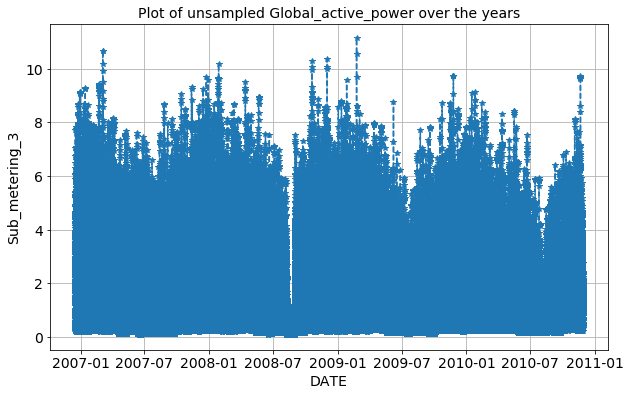

In [14]:
# plot of the Global_active_power over the years. This feature was selected at random. so you can pick any and see how it
# behaved over time

plt.figure(figsize= (10,6))
plt.plot(df_data['Global_active_power'], '--', marker= '*', )
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.xlabel('DATE', fontsize= 14)
plt.ylabel('Sub_metering_3', fontsize= 14)
plt.title('Plot of unsampled Global_active_power over the years', fontsize= 14)

***From the above plot, we cant get any information from it because of the volume of the dataset. Hence we downsample***

# Resampling

In [15]:
# Downsampling to daily data points

df_daily= df_data.resample('D').mean()
print('The shape of the downsampled data: ' +str(df_daily.shape))
df_daily.head()

The shape of the downsampled data: (1442, 7)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DATE,,,,,,,
2006-12-16,3.053475,0.088187,236.243759,13.082829,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,240.087021,9.999028,1.411806,2.907639,9.264584
2006-12-18,1.530435,0.112356,241.231689,6.421667,0.738194,1.820139,9.734722
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
2006-12-20,1.545658,0.111804,242.308060,6.467361,0.000000,1.838889,9.765972


Text(0.5, 1.0, 'Global_active_power vs YEAR')

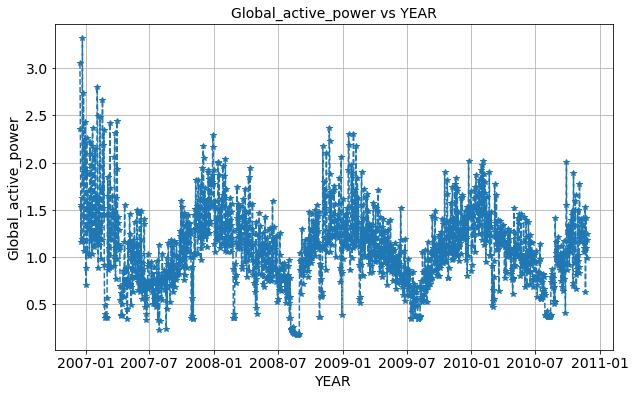

In [16]:
# plot of downsampled Global_active_power over the years

plt.figure(figsize= (10,6))
plt.plot(df_daily['Global_active_power'], '--', marker= '*', )
plt.grid()
plt.xlabel('YEAR', fontsize= 14)
plt.ylabel('Global_active_power', fontsize= 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Global_active_power vs YEAR', fontsize= 14)

#### check for correlation between Global_active_power and Global_reactive_power

In [17]:
from scipy.stats import pearsonr

corr, _ = pearsonr(df_data['Global_active_power'], df_data['Global_reactive_power'])
print('Pearsons correlation: %.2f' % corr)

Pearsons correlation: 0.25


#### check for correlation between Voltage and Global_intensity

In [18]:
from scipy.stats import pearsonr

corr, _ = pearsonr(df_data['Voltage'], df_data['Global_intensity'])
print('Pearsons correlation: %.2f' % corr)

Pearsons correlation: -0.41


# Smoothing Time Series Data

In [19]:
df_data.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [20]:
# An input function to select the feature we want to analyse. we'll go ahead with Global_active_power

feat= input('Input the name of the feature: ')

feat_series= df_daily[feat]
df_feat= pd.DataFrame(feat_series)
df_feat.head()

Input the name of the feature: Global_active_power


,Global_active_power
DATE,
2006-12-16,3.053475
2006-12-17,2.354486
2006-12-18,1.530435
2006-12-19,1.157079
2006-12-20,1.545658


In [21]:
# The simple moving average with window value of 12. Note: As the dataset was downsampled to days, with a window of 12, it means
# that for every first 12 observations of the feature, they will be averaged and represented as a single point

df_feat['MA_12'] = df_feat.rolling(12, min_periods=1).mean()
df_feat.head(10)

,Global_active_power,MA_12
DATE,,
2006-12-16,3.053475,3.053475
2006-12-17,2.354486,2.703980
2006-12-18,1.530435,2.312799
2006-12-19,1.157079,2.023869
2006-12-20,1.545658,1.928227
2006-12-21,1.192440,1.805596
2006-12-22,1.625929,1.779929
2006-12-23,3.314851,1.971794
2006-12-24,1.770842,1.949466


Text(0, 0.5, 'Global_active_power')

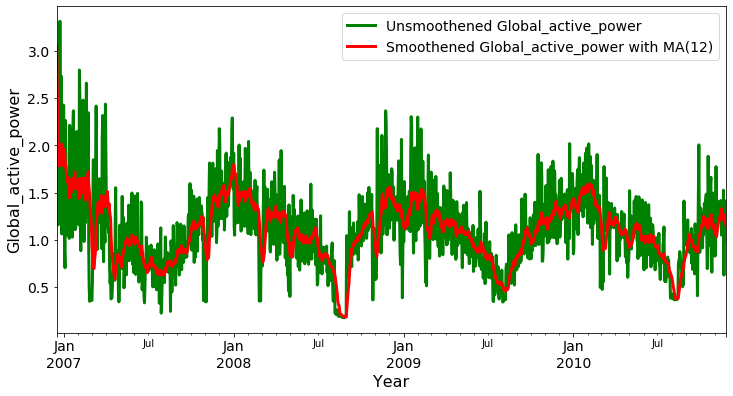

In [22]:
colors = ['green', 'red']

# lineplot
df_feat.plot(color=colors, linewidth=3, figsize=(12,6))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Unsmoothened Global_active_power', 'Smoothened Global_active_power with MA(12)'], fontsize=14)

# labels
plt.xlabel('Year', fontsize=16)
plt.ylabel('Global_active_power', fontsize=16)

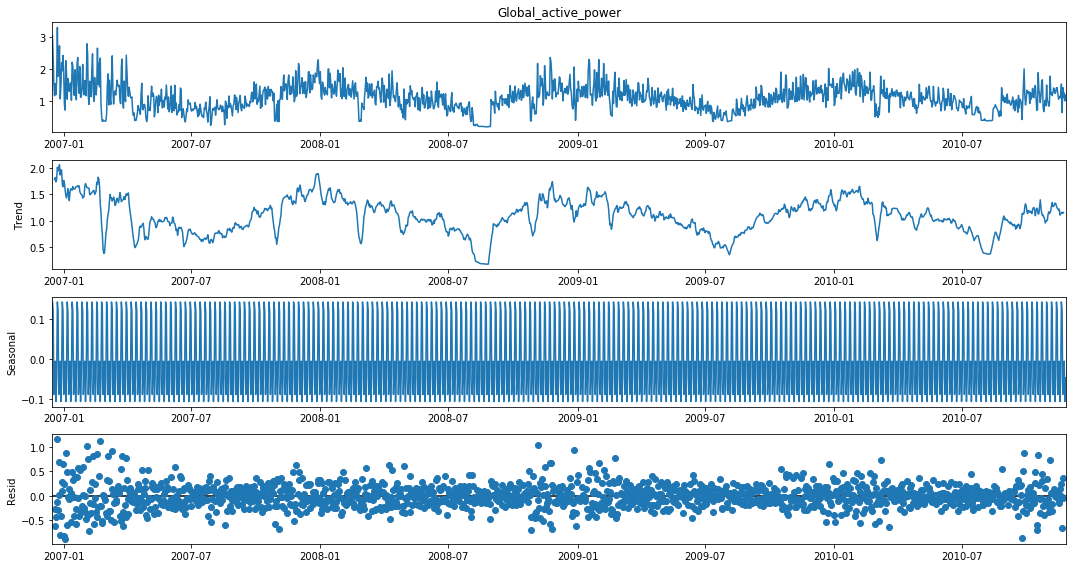

In [23]:
# Now, we will decompose the smoothened dataset to reveal underlying trends and seasonality

import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize']= 15,8
decompose_series= sm.tsa.seasonal_decompose(df_feat['Global_active_power'], model= 'additive')
decompose_series.plot()
plt.show()

***As observed, there's presence of trend in the dataset***

In [24]:
df_feat['Global_active_power']

DATE
2006-12-16    3.053475
2006-12-17    2.354486
2006-12-18    1.530435
2006-12-19    1.157079
2006-12-20    1.545658
                ...   
2010-11-22    1.417733
2010-11-23    1.095511
2010-11-24    1.247394
2010-11-25    0.993864
2010-11-26    1.178230
Freq: D, Name: Global_active_power, Length: 1442, dtype: float32

# Check for Stationarity with ADF Test
#### The idea of ADF test is to confirm if the dataset is actually non-stationary. Although we have seen it in the decomped plot above, the ADF test will give us a stronger confirmation

In [25]:
from statsmodels.tsa.stattools import adfuller

adf_result= adfuller(df_feat['Global_active_power'])

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used: {adf_result[3]}')
print('Critical Values: ')

for k, v in adf_result[4].items():
    print(f' {k}: {v}')

ADF Statistic: -3.6867338259363867
p-value: 0.004303671874258713
No. of lags used: 22
No. of observations used: 1419
Critical Values: 
 1%: -3.434966750462565
 5%: -2.8635789736973725
 10%: -2.5678555388041384


***ADF tells if there's some stationarity in the dataset or not. Hence, if the:
A) P-value is greater than the 5% Critical value and
B) ADF Statistic is greater than any of the Critical values, IT MEANS THE DATASET IS NON-STATIONARY i.e that there's a trend. That could be seen on the decomposed plot; the trend plot***

# Dealing with the non-stationarity of the dataset by removing trends and seasonality

Text(0, 0.5, 'Global_active_power')

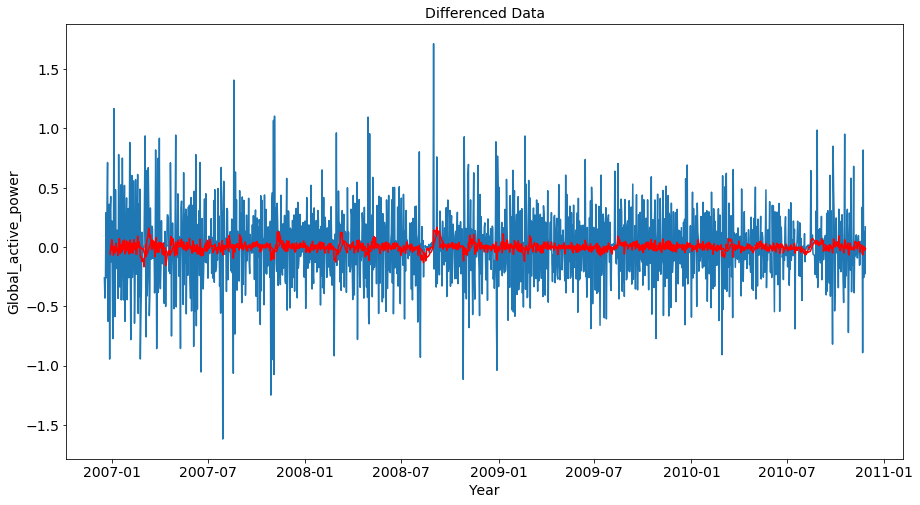

In [26]:
# Transforming and Differencing


df_log= np.log(df_feat)
df_diff= df_log.diff(periods= 1) 

plt.plot(df_diff.index, df_diff.Global_active_power, '-')
plt.plot(df_diff.rolling(12).mean(), color= 'red')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title('Differenced Data', fontsize= 14)
plt.xlabel('Year', fontsize= 14)
plt.ylabel('Global_active_power', fontsize= 14)

In [27]:
df_diff= df_diff[['Global_active_power']]
print(df_diff.shape)
df_diff.head()

(1442, 1)


,Global_active_power
DATE,
2006-12-16,NaN
2006-12-17,-0.259958
2006-12-18,-0.430771
2006-12-19,-0.279653
2006-12-20,0.289551


In [28]:
# getting rid of the NaN value

df_diff= df_diff.iloc[1:]
print(df_diff.shape)
df_diff.head()

(1441, 1)


,Global_active_power
DATE,
2006-12-17,-0.259958
2006-12-18,-0.430771
2006-12-19,-0.279653
2006-12-20,0.289551
2006-12-21,-0.259448


# ACF & PACF Plots

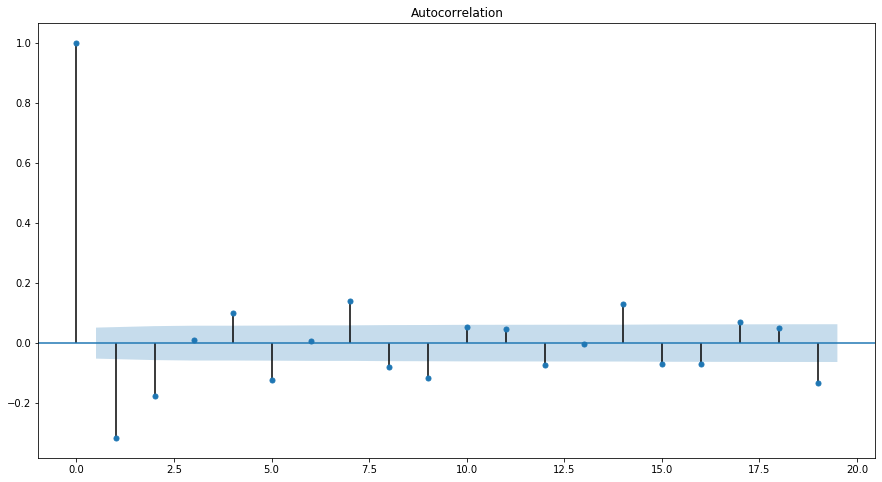

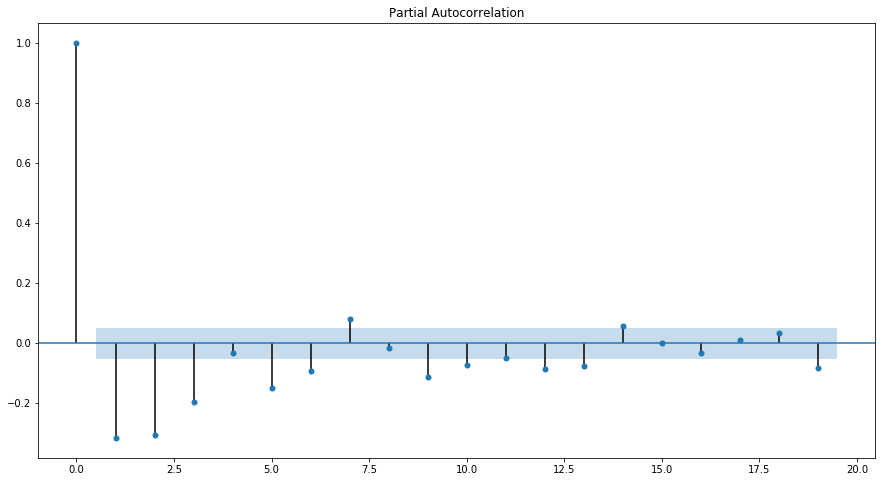

In [29]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF
plot_acf(df_diff.Global_active_power, lags= range(0, 20))
plt.show()

# PACF
plot_pacf(df_diff.Global_active_power, lags= range(0, 20))
plt.show()

# Building the model

### ARIMA model

Text(0.5, 0, 'DATE')

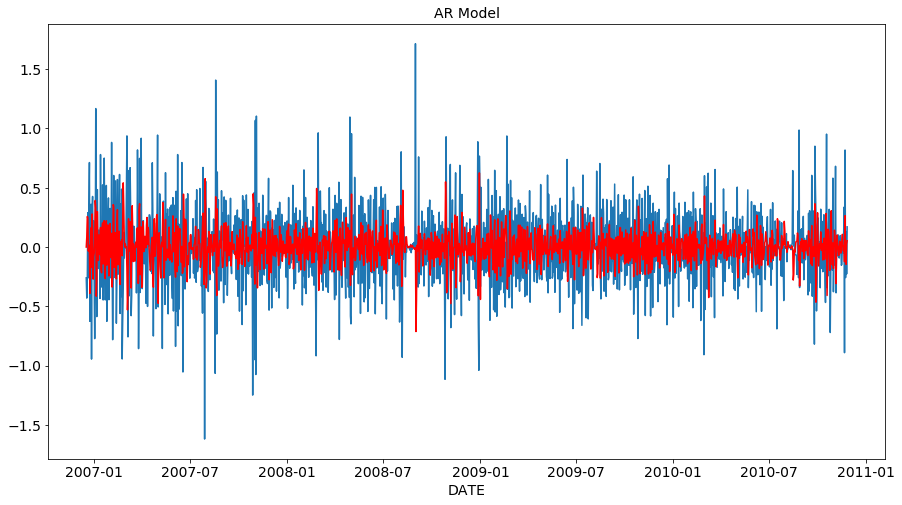

In [30]:
# Arima model(p,d,q= 2,0,0)

AR_model= ARIMA(df_diff, order= (2, 0, 0))
AR_model_results= AR_model.fit()
plt.plot(df_diff)
plt.plot(AR_model_results.fittedvalues, color= 'red')
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.title('AR Model', fontsize= 14)
plt.xlabel('DATE', fontsize= 14)

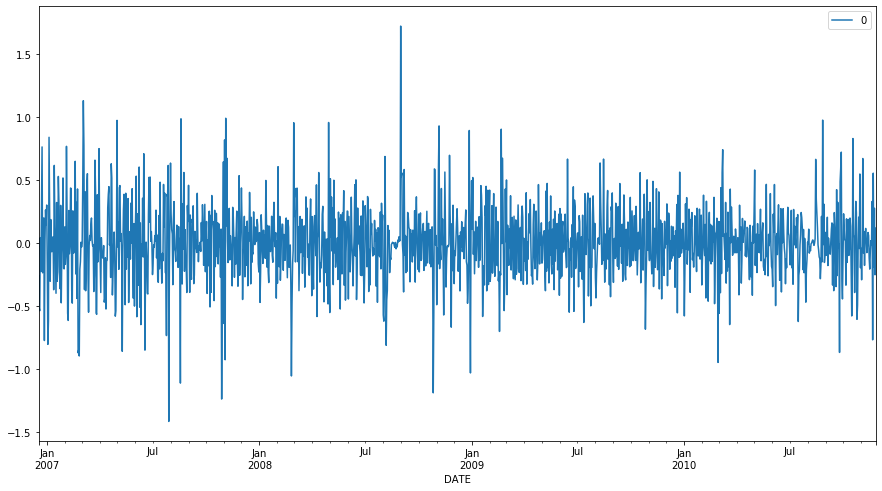

In [31]:
# Now we plot the residual to see if it will give a random plot like a white noise. White noise has a mean of zero. if that's 
# the case, then the model is a good one

from pandas import DataFrame

residuals= DataFrame(AR_model_results.resid)
residuals.plot()

In [32]:
# we check the aic value of the model. Note: the idea of getting the aic value is for us to pick the best model with the lowest
# aic value. We test different models based on different order (p,d,q) values

AR_model_results.aic

597.2981411611727

In [33]:
residuals.describe()

,0
count,1441.000000
mean,-0.000204
std,0.296985
min,-1.414022
25%,-0.177439
50%,-0.001528
75%,0.166558
max,1.719403


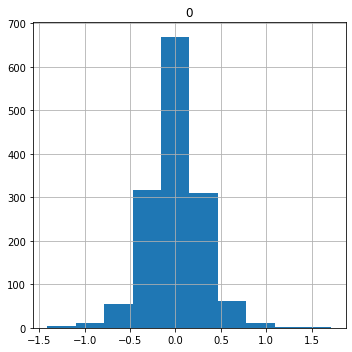

In [34]:
# further check on the residual to see if it follow a normal distribution with a centered zero mean. As said earlier, the 
# residual plot should behave like a white noise, having a mean of zero

fig = plt.figure(figsize = (5,5))
ax = fig.gca()
residuals.hist(ax = ax)
plt.tight_layout()

Text(0.5, 1.0, 'ARIMA Model')

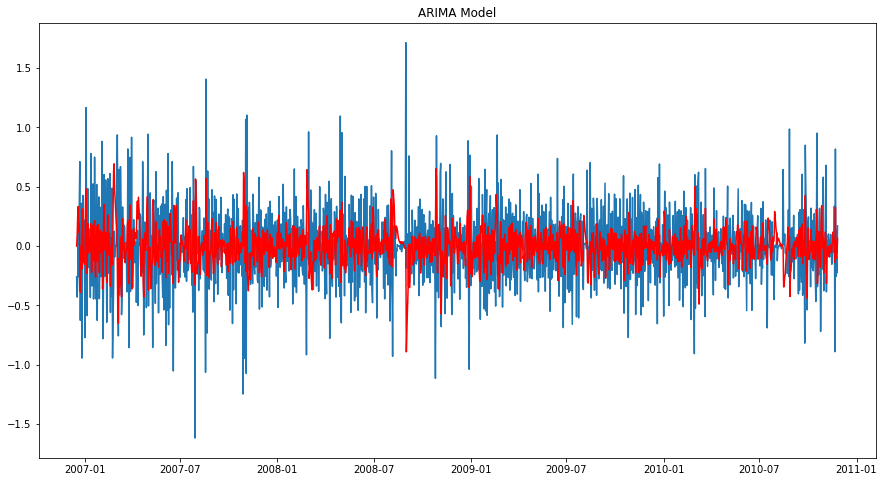

In [35]:
# Arima model(p,d,q= 2,0,1)

ARIMA_model= ARIMA(df_diff, order= (2, 0, 1))
ARIMA_results= ARIMA_model.fit()
plt.plot(df_diff)
plt.plot(ARIMA_results.fittedvalues, color= 'red')
plt.title('ARIMA Model')

In [36]:
ARIMA_results.aic

514.5686724858724

***we can see that the order of (p= 2, d= 0, q= 1) gave us a lower aic value that the order (2,0,0) we used earlier. Hence
this arima model is selected as the better model***

## Moving Average (MA) model

Text(0.5, 1.0, 'MA Model')

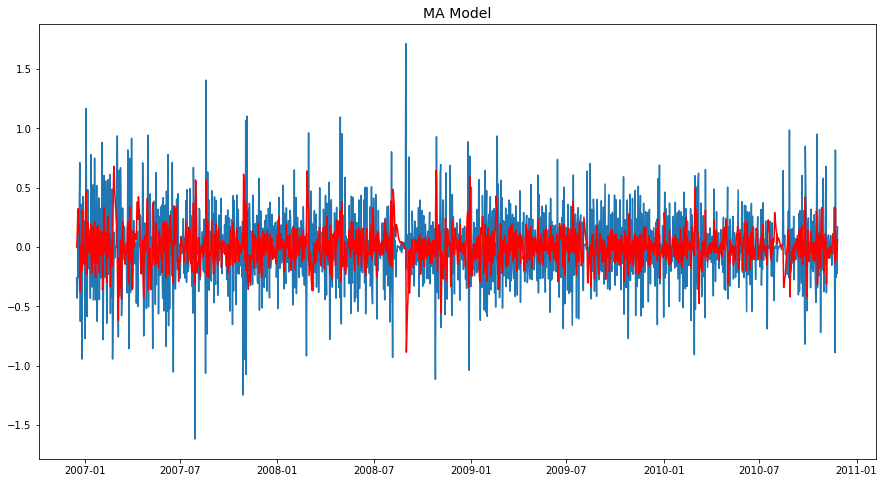

In [37]:
# using Moving Average model

MA_model= ARIMA(df_diff, order= (0, 0, 2))
MA_model_results= MA_model.fit()
plt.plot(df_diff)
plt.plot(MA_model_results.fittedvalues, color= 'red')
plt.title('MA Model', fontsize= 14)

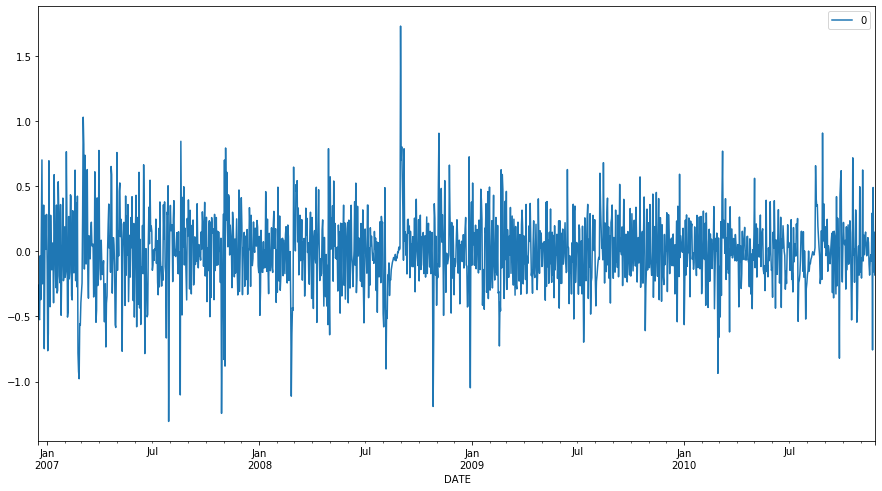

In [38]:
residuals= DataFrame(MA_model_results.resid)
residuals.plot()

In [39]:
MA_model_results.aic

511.80952226843556

In [40]:
# check for zero mean for MA_model residual

residuals.describe()

,0
count,1441.000000
mean,-0.000581
std,0.288332
min,-1.306267
25%,-0.168551
50%,0.001916
75%,0.171677
max,1.729701


# Applying Facebook Prophet Model

In [41]:
# splitting the daily sampled dataset into train and test

fbp_train= df_daily[0:1077]
fbp_test= df_daily[1077:]
print(fbp_train.shape)
print(fbp_test.shape)

(1077, 7)
(365, 7)


In [42]:
# importing fbprophet

from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [43]:
fbp_data= fbp_train
fbp_data['DATE']= pd.to_datetime(fbp_train.index)
fbp_data.head()

C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DATE
DATE,,,,,,,,
2006-12-16,3.053475,0.088187,236.243759,13.082829,0.000000,1.378788,12.439394,2006-12-16
2006-12-17,2.354486,0.156949,240.087021,9.999028,1.411806,2.907639,9.264584,2006-12-17
2006-12-18,1.530435,0.112356,241.231689,6.421667,0.738194,1.820139,9.734722,2006-12-18
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472,2006-12-19
2006-12-20,1.545658,0.111804,242.308060,6.467361,0.000000,1.838889,9.765972,2006-12-20


In [44]:
feat= input('Input the name of the feature: ')

feat_series= fbp_data[feat]
df_fea= pd.DataFrame(feat_series)
df_date= pd.DataFrame(fbp_data['DATE'])
df_feat= pd.concat([df_date, df_fea], axis= 1)
df_feat.reset_index(drop=True, inplace=True)
df_feat.head()

Input the name of the feature: Global_active_power


,DATE,Global_active_power
0,2006-12-16,3.053475
1,2006-12-17,2.354486
2,2006-12-18,1.530435
3,2006-12-19,1.157079
4,2006-12-20,1.545658


In [45]:
# rename columns
df_feat= df_feat.rename(columns= {'DATE': 'ds', feat: 'y'})
print(df_feat.shape)
df_feat.head()

(1077, 2)


,ds,y
0,2006-12-16,3.053475
1,2006-12-17,2.354486
2,2006-12-18,1.530435
3,2006-12-19,1.157079
4,2006-12-20,1.545658


In [46]:
# since the fbp_test contains 365 observations, we will pick the first 365 observations of the fbp_train

df_feat= df_feat[0:365]
print(df_feat.shape)
df_feat.head()

(365, 2)


,ds,y
0,2006-12-16,3.053475
1,2006-12-17,2.354486
2,2006-12-18,1.530435
3,2006-12-19,1.157079
4,2006-12-20,1.545658


In [47]:
# initialising and fitting the model

model= Prophet()
model.fit(df_feat)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Administrator\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [48]:
# prediction for the next 365 days

future= model.make_future_dataframe(periods=365, freq= 'D')
forecast= model.predict(future)
forecast.head()

# yhat is the prediction
forecast[['ds', 'yhat']]

,ds,yhat
0,2006-12-16,1.930974
1,2006-12-17,1.991847
2,2006-12-18,1.643907
3,2006-12-19,1.650451
4,2006-12-20,1.695286
...,...,...
725,2008-12-10,3.233347
726,2008-12-11,3.153833
727,2008-12-12,3.197536
728,2008-12-13,3.461788


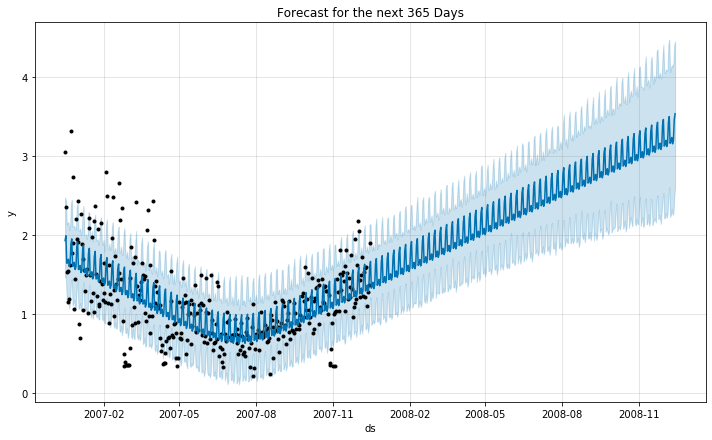

In [49]:
model.plot(forecast)
plt.title('Forecast for the next 365 Days')
plt.show()

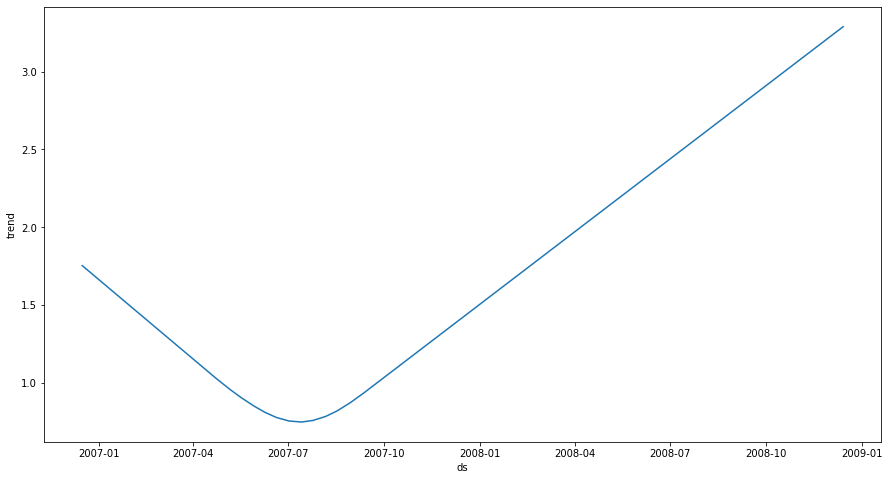

In [50]:
plt.plot(forecast['ds'], forecast['trend'])
plt.xlabel('ds')
plt.ylabel('trend')
plt.show()